In [1]:
# パッケージのインポート
import tensorflow as tf
import numpy as np
#from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
import tensorflow.examples.tutorials.mnist.input_data as input_data
tf.logging.set_verbosity(tf.logging.ERROR)

In [2]:
# Fashion-MNISTをダウンロードしてdata/fashionに格納
fashion = input_data.read_data_sets(
    'data/fashion', # 格納先のフォルダーを作成
    source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/',
    one_hot=True    # ラベルをワンホット表現にする
)

Extracting data/fashion\train-images-idx3-ubyte.gz
Extracting data/fashion\train-labels-idx1-ubyte.gz
Extracting data/fashion\t10k-images-idx3-ubyte.gz
Extracting data/fashion\t10k-labels-idx1-ubyte.gz


In [3]:
# データセットを確認
# テスト用データをすべて抽出
ft=fashion.train.next_batch(60000)
print(ft[0].shape)  #出力：(10000, 784)
print(ft[1].shape)  #出力：(10000, 10)

ft = fashion.train.next_batch(3)         # 訓練データを3個抽出
print('tf_type:', type(ft))              # 出力：tf_type: <class 'tuple'>
print('tf_length:', len(ft))             # 出力：tf_length: 2
print('test_images_shape:', ft[0].shape) # 出力：test_images_shape: (3, 784)
print('test_labels_shape:', ft[1].shape) # 出力：test_labels_shape: (3, 10)

(60000, 784)
(60000, 10)
tf_type: <class 'tuple'>
tf_length: 2
test_images_shape: (3, 784)
test_labels_shape: (3, 10)


In [4]:
# 画像データの行列を出力
print('test_images:\n', ft[0][0])

test_images:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.      

In [5]:
# ワンホット表現の正解ラベルを出力
print('test_labels:\n', ft[1][0])

test_labels:
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


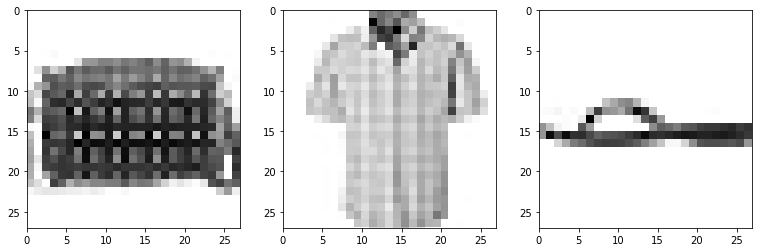

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
# 抽出したデータを出力（プロット）
%matplotlib inline
import matplotlib.pyplot as plt

# グラフエリアのサイズを3×3にする
plt.ﬁgure(ﬁgsize=(13, 4))
# グレースケールにする
plt.gray()

## 1番目の訓練データを描画
plt.subplot(131)
# 1番目の784個のピクセル値を28×28の行列にする
img = ft[0][0].reshape(28, 28)
# 色相を反転させてプロットする
plt.pcolor(255 - img)
plt.xlim(0, 27)   # x軸を0~28の範囲
plt.ylim(27, 0)   # y軸を28~0の範囲

## 2番目の訓練データを描画
plt.subplot(132)
# 2番目の784個のピクセル値を28×28の行列にする
img = ft[0][1].reshape(28, 28)
# 色相を反転させてプロットする
plt.pcolor(255 - img)
plt.xlim(0, 27)   # x軸を0~28の範囲
plt.ylim(27, 0)   # y軸を28~0の範囲

## 3番目の訓練データを描画
plt.subplot(133)
# 3番目の784個のピクセル値を28×28の行列にする
img = ft[0][2].reshape(28, 28)
# 色相を反転させてプロットする
plt.pcolor(255 - img)
plt.xlim(0, 27)   # x軸を0~28の範囲
plt.ylim(27, 0)   # y軸を28~0の範囲

plt.show()

print(ft[1][0])   # 1番目の正解ラベルを出力
print(ft[1][1])   # 2番目の正解ラベルを出力
print(ft[1][2])   # 3番目の正解ラベルを出力

In [7]:
# テスト用データをすべて抽出
test_images, test_labels = fashion.test.next_batch(10000)
print(test_images.shape)  #出力：(10000, 784)
print(test_labels.shape)  #出力：(10000, 10)

(10000, 784)
(10000, 10)


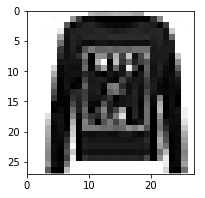

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
# テスト用画像の確認
%matplotlib inline
import matplotlib.pyplot as plt

# グラフエリアのサイズを3×3にする
plt.ﬁgure(ﬁgsize=(3, 3))
# グレースケールにする
plt.gray()        
# 1番目の784個のピクセル値を28×28の行列にする
img = test_images[0, :].reshape(28, 28)
# 色相を反転させてプロットする
plt.pcolor(255 - img)
plt.xlim(0, 27)   # x軸を0~28の範囲
plt.ylim(27, 0)   # y軸を28~0の範囲
plt.show()

print(test_labels[0]) # 1番目の正解ラベルを出力

In [9]:
# 学習率、学習回数、ミニバッチのサイズを設定
learning_rate = 0.5    # 学習率
training_epochs = 1500 # 学習回数
batch_size = 50        # ミニバッチのサイズ

In [10]:
# データフローグラフ

# 入力層（ニューロン数＝784）（行数可変, 各データのサイズ＝784列）
x = tf.placeholder(tf.float32, [None, 784])
# 画像データ20個を28×28の行列にしてログに出力できるようにする
img = tf.reshape(x,[-1,28,28,1]) 
# 画像のサマリーを20個ログに出力する
tf.summary.image("input_data", img, 20)

# 隠れ層（ニューロン数＝64）
with tf.name_scope("hidden"):
    # 重み(各データのサイズ＝784行, ニューロン数＝64列)
    w1 = tf.Variable(tf.truncated_normal([784, 64], stddev=0.1), name="w1")
    # バイアス(ニューロン数＝64列)
    b1 = tf.Variable(tf.zeros([64]), name="b1")
    # 活性化関数:出力(入力データの行数＝50行, ニューロン数＝64列)
    h1 = tf.nn.sigmoid(tf.matmul(x, w1) + b1)

# 出力層（ニューロン数＝10）
with tf.name_scope("output"):
    # 重み(前層のニューロン数＝64行,クラス数＝ニューロン数＝10列)
    w2 = tf.Variable(tf.truncated_normal([64, 10], stddev=0.1), name="w2")
    # バイアス(クラス数＝ニューロン数＝10列)
    b2 = tf.Variable(tf.zeros([10]), name="b2")
    # 活性化関数:出力((前層の出力行数＝50行, 2層のニューロン数＝10列)
    out = tf.nn.softmax(tf.matmul(h1, w2) + b2)

#　誤差関数
with tf.name_scope("loss"):
    # 正解ラベルを保持するプレースホルダー(行数可変, 列数は正解ラベルと同じ1)
    t = tf.placeholder(tf.float32, [None, 10])
    # クロスエントロピー誤差関数
    loss = tf.reduce_mean(
              -tf.reduce_sum(t*tf.log(out + 1e-5), axis=[1]))
    # 誤差をログとして出力
    tf.summary.scalar("loss", loss)

# 訓練(ミニマイザー)
with tf.name_scope("train"):
    train_step = tf.train.GradientDescentOptimizer(
        learning_rate   # 学習率
    ).minimize(loss)    # 最小化問題を解く

# 評価
with tf.name_scope("accuracy"):
    # (out＝t)の最大値を比較
    correct = tf.equal(tf.argmax(out,1), tf.argmax(t,1))
    # True(正解＝1)の平均を取る
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    # 精度をログとして出力
    tf.summary.scalar("accuracy", accuracy)

# 変数を初期化するopノード
init =tf.global_variables_initializer()
# ログをマージするopノード
summary_op = tf.summary.merge_all()

In [11]:
# セッション部
with tf.Session() as sess:
    summary_writer = tf.summary.FileWriter(
        "logs",    # イベントファイルの保存先
        sess.graph # データフローグラフを視覚化する
        )
    sess.run(init) # initノードを実行して変数を初期化
    for epoch in range(training_epochs):
        # ミニバッチを抽出
        train_images, train_labels = fashion.train.next_batch(50)
        
        sess.run(
            train_step,                   # ミニマイザーを実行
            feed_dict={x:train_images,    # 訓練データのミニバッチ
                       t:train_labels}    # 正解ラベルのミニバッチ
            )

        # 50回ごとにテストデータを使用して精度を出力
        epoch += 1
        if epoch % 50 == 0:
            acc_val = sess.run(
                accuracy,                  # クロスエントロピー誤差のオペレーション
                feed_dict={x:test_images,  # テストテータをセット
                           t:test_labels}) # テストデータの正解ラベル
            print('(%d) accuracy = %.2f' % (epoch, acc_val))

            # イベントログをsummary_strに代入
            summary_str = sess.run(
                summary_op,                # ログをマージするopノード
                feed_dict={x:test_images,  # テストテータをセット
                           t:test_labels}) # テストデータの正解ラベル
            # イベントファイルにログを追加
            summary_writer.add_summary(summary_str, epoch)

(50) accuracy = 0.66
(100) accuracy = 0.71
(150) accuracy = 0.76
(200) accuracy = 0.74
(250) accuracy = 0.76
(300) accuracy = 0.77
(350) accuracy = 0.77
(400) accuracy = 0.79
(450) accuracy = 0.81
(500) accuracy = 0.81
(550) accuracy = 0.77
(600) accuracy = 0.82
(650) accuracy = 0.80
(700) accuracy = 0.81
(750) accuracy = 0.81
(800) accuracy = 0.81
(850) accuracy = 0.82
(900) accuracy = 0.82
(950) accuracy = 0.82
(1000) accuracy = 0.83
(1050) accuracy = 0.83
(1100) accuracy = 0.82
(1150) accuracy = 0.82
(1200) accuracy = 0.82
(1250) accuracy = 0.81
(1300) accuracy = 0.84
(1350) accuracy = 0.82
(1400) accuracy = 0.80
(1450) accuracy = 0.83
(1500) accuracy = 0.84
